In [1]:
import numpy as np
import matplotlib.pyplot as plt

import adr

In [2]:
# Datos de los nudos
coordenadas = {1:(0, 0), 2:(0.4,0), 3:(0,0.68), 4:(0.4,0.68), 5:(0,1.13),
6:(0.4,1.13), 7:(0,1.63), 8:(0.4,1.63), 9:(0,2.13), 10:(.4,2.13),
11:(0,2.63), 12:(0.4,2.63), 13:(0, 3.13), 14:(.4,3.13), 15:(0,3.63),
16:(.4,3.63), 17:(0,4.13), 18:(.4,4.13), 19:(0,4.63), 20:(.4,4.63),
21:(-4.18,5.28), 22:(-4.18,5.73), 23:(-3.865,5.73), 24:(-3.615,5.28),
25:(-3.365,5.73), 26:(-3.115,5.28), 27:(-2.865,5.73), 28:(-2.615,5.28),
29:(-2.365,5.73), 30:(-2.115, 5.28), 31:(-1.865,5.73), 32:(-1.615,5.28),
33:(-1.365,5.73), 34:(-1.05,5.28), 35:(-1.05,5.73), 36:(-.7813,5.73),
37:(-.5313,5.28), 38:(-0.2813,5.73), 39:(0,5.28), 40:(0,5.73),
41:(.4,5.28), 42:(.4,5.73), 43:(0.6814,5.73), 44:(0.9314,5.28),
45:(1.1814,5.73), 46:(1.45,5.28), 47:(1.45,5.73), 48:(1.765,5.73),
49:(2.015,5.28), 50:(2.265,5.73), 51:(2.515,5.28),52:(2.765,5.73),
53:(3.015,5.28), 54:(3.265,5.73), 55:(3.515,5.28), 56:(3.765,5.73),
57:(4.015,5.28), 58:(4.265,5.73), 59:(4.58,5.28), 60:(4.58,5.73)}

restr = {1: (1, 1), 2: (1, 1)} # Nº de nudo y restricciones en x e y
cargas = {3: (0, -400e3), 4:(800e3, -400e3)} # No está correcto aún

In [3]:
freq = 15.0 # (Hz) Frecuencia de vibración de las cargas (solo viento)

# Datos de las barras
## Materiales
m1 = adr.Material(7850, 200e9)

In [4]:
## Secciones transversales
s1 = adr.SeccionTransversal(2550*1e-6) # Cordón superior e inferior
s2 = adr.SeccionTransversal(4936.8*1e-6) # Cordones zona de refuerzo y pilar
s3 = adr.SeccionTransversal(693.6*1e-6) # Diagonal vigas
s4 = adr.SeccionTransversal(940.44*1e-6) # Diagonal vigas zona de refuerzo
s5 = adr.SeccionTransversal(7486.8*1e-6) # Vertical conexión con zona de refuerzo
s6 = adr.SeccionTransversal(2*1270*1e-6) # Planchuela horizontal
s7 = adr.SeccionTransversal(1270*1e-6) # Planchuela diagonal

In [5]:
## Datos de los elementos
elementos = [(3,4,m1,s6), (5,6,m1,s6), (7,8,m1,s6), (9,10,m1,s6),
(11,12,m1,s6), (13,14,m1,s6), (15,16,m1,s6), (17,18,m1,s6), (19,20,m1,s6),
(21,24,m1,s1), (24,26,m1,s1), (26,28,m1,s1), (28,30,m1,s1), (30,32,m1,s1),
(32,34,m1,s1), (34,37,m1,s2), (37,39,m1,s2), (39,41,m1,s6), (41,44,m1,s2),
(44,46,m1,s2), (46,49,m1,s1), (49,51,m1,s1), (51,53,m1,s1), (53,55,m1,s1),
(55,57,m1,s1), (57,59,m1,s1), (22,23,m1,s1), (23,25,m1,s1), (25,27,m1,s1),
(27,29,m1,s1), (29,31,m1,s1), (31,33,m1,s1), (33,35,m1,s1), (35,36,m1,s2),
(36,38,m1,s2), (38,40,m1,s2), (40,42,m1,s6), (42,43,m1,s2), (43,45,m1,s2),
(45,47,m1,s2), (47,48,m1,s1), (48,50,m1,s1), (50,52,m1,s1), (52,54,m1,s1),
(54,56,m1,s1), (56,58,m1,s1), (58,60,m1,s1), (48,50,m1,s1), (1,3,m1,s2),
(2,4,m1,s2), (3,5,m1,s2), (4,6,m1,s2), (5,7,m1,s2), (6,8,m1,s2),
(7,9,m1,s2), (8,10,m1,s2), (9,11,m1,s2), (10,12,m1,s2), (11,13,m1,s2),
(12,14,m1,s2), (13,15,m1,s2), (14,16,m1,s2), (15,17,m1,s2), (16,18,m1,s2),
(17,19,m1,s2), (18,20,m1,s2), (19,39,m1,s2), (20,41,m1,s2), (21,22,m1,s1),
(34,35,m1,s5), (39,40,m1,s2), (41,42,m1,s2), (46,47,m1,s5), (59,60,m1,s1),
(1,4,m1,s7), (4,5,m1,s7), (5,8,m1,s7), (8,9,m1,s7), (9,12,m1,s7),
(12,13,m1,s7), (13,16,m1,s7), (16,17,m1,s7), (17,20,m1,s7), (20,39,m1,s7),
(21,23,m1,s3), (23,24,m1,s3), (24,25,m1,s3), (25,26,m1,s3), (26,27,m1,s3),
(27,28,m1,s3), (28,29,m1,s3), (29,30,m1,s3), (30,31,m1,s3), (31,32,m1,s3),
(32,33,m1,s3), (33,34,m1,s3), (34,36,m1,s4), (36,37,m1,s4), (37,38,m1,s4),
(38,39,m1,s4), (39,42,m1,s6), (41,43,m1,s4), (43,44,m1,s4), (44,45,m1,s4),
(45,46,m1,s4), (46,48,m1,s3), (48,49,m1,s3), (49,50,m1,s3), (50,51,m1,s3),
(51,52,m1,s3), (52,53,m1,s3), (53,54,m1,s3), (54,55,m1,s3), (55,56,m1,s3),
(56,57,m1,s3), (57,58,m1,s3), (58,59,m1,s3)]

In [6]:
propiedades = adr.config(coordenadas, restr, cargas, elementos)

In [7]:
nudos = propiedades['Nudos']
barras = propiedades['Barras']

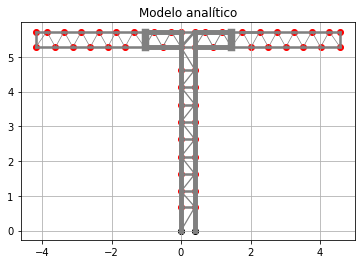

In [8]:
for barra in barras:
    barra.dibuja2D()
for nudo in nudos:
    nudo.dibuja_2D(False)
plt.axis('equal');
plt.title("Modelo analítico")
plt.grid()

In [9]:
mps = 10
resultados = adr.procesamiento(coordenadas, restr, cargas, elementos, freq, lapso=10, mps=mps, tipo_analisis='dinamico')

In [10]:
frecuencias = resultados[1]

In [11]:
modos = resultados[2]

In [12]:
# Normalización: Que cada autovector tenga su máxima componente igual a 1
maximos = np.max(modos, axis=0)
# Modos normalizados en las filas
normalizado = np.array([modo/maximos[i] for i, modo in enumerate(modos.T)])

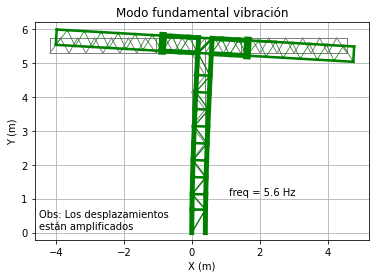

In [13]:
mod = 0
for barra in barras:
    barra.dibuja2D(False)
for barra in barras:
    barra.dibuja2D_deform(normalizado[mod], amp=.25, colorear=False)
plt.axis('equal');
plt.grid()
plt.title("Modo fundamental vibración")
plt.text(1.1, 1.1, f"freq = {frecuencias[mod]:.1f} Hz")
plt.text(-4.5, 0.1, "Obs: Los desplazamientos\nestán amplificados")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.savefig("Modo01.png", dpi=200)

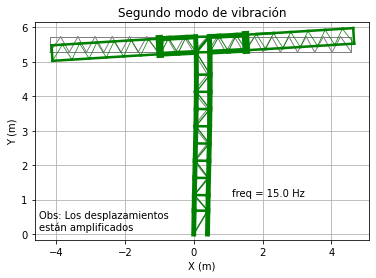

In [14]:
mod = 1
for barra in barras:
    barra.dibuja2D(False)
for barra in barras:
    barra.dibuja2D_deform(normalizado[mod], amp=.25, colorear=False)
plt.axis('equal');
plt.grid()
plt.title("Segundo modo de vibración")
plt.text(1.1, 1.1, f"freq = {frecuencias[mod]:.1f} Hz")
plt.text(-4.5, 0.1, "Obs: Los desplazamientos\nestán amplificados")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.savefig("Modo02.png", dpi=200)

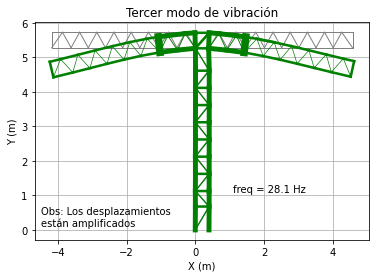

In [15]:
mod = 2
for barra in barras:
    barra.dibuja2D(False)
for barra in barras:
    barra.dibuja2D_deform(normalizado[mod], amp=.05, colorear=False)
plt.axis('equal');
plt.grid()
plt.title("Tercer modo de vibración")
plt.text(1.1, 1.1, f"freq = {frecuencias[mod]:.1f} Hz")
plt.text(-4.5, 0.1, "Obs: Los desplazamientos\nestán amplificados")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.savefig("Modo03.png", dpi=200)

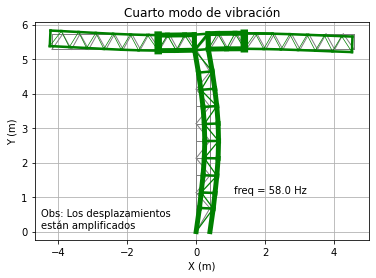

In [16]:
mod = 3
for barra in barras:
    barra.dibuja2D(False)
for barra in barras:
    barra.dibuja2D_deform(normalizado[mod], amp=.25, colorear=False)
plt.axis('equal');
plt.grid()
plt.title("Cuarto modo de vibración")
plt.text(1.1, 1.1, f"freq = {frecuencias[mod]:.1f} Hz")
plt.text(-4.5, 0.1, "Obs: Los desplazamientos\nestán amplificados")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.savefig("Modo04.png", dpi=200)

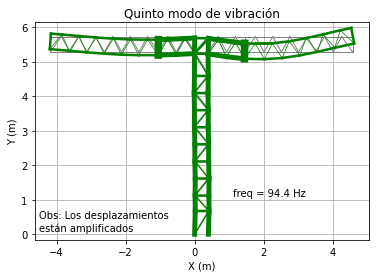

In [17]:
mod = 4
for barra in barras:
    barra.dibuja2D(False)
for barra in barras:
    barra.dibuja2D_deform(normalizado[mod], amp=.25, colorear=False)
plt.axis('equal');
plt.grid()
plt.title("Quinto modo de vibración")
plt.text(1.1, 1.1, f"freq = {frecuencias[mod]:.1f} Hz")
plt.text(-4.5, 0.1, "Obs: Los desplazamientos\nestán amplificados")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.savefig("Modo05.png", dpi=200)

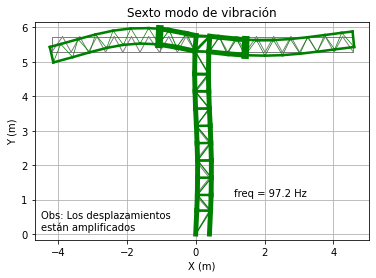

In [18]:
mod = 5
for barra in barras:
    barra.dibuja2D(False)
for barra in barras:
    barra.dibuja2D_deform(normalizado[mod], amp=.25, colorear=False)
plt.axis('equal');
plt.grid()
plt.title("Sexto modo de vibración")
plt.text(1.1, 1.1, f"freq = {frecuencias[mod]:.1f} Hz")
plt.text(-4.5, 0.1, "Obs: Los desplazamientos\nestán amplificados")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.savefig("Modo06.png", dpi=200)

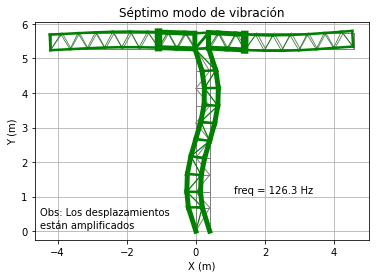

In [19]:
mod = 6
for barra in barras:
    barra.dibuja2D(False)
for barra in barras:
    barra.dibuja2D_deform(normalizado[mod], amp=.25, colorear=False)
plt.axis('equal');
plt.grid()
plt.title("Séptimo modo de vibración")
plt.text(1.1, 1.1, f"freq = {frecuencias[mod]:.1f} Hz")
plt.text(-4.5, 0.1, "Obs: Los desplazamientos\nestán amplificados")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.savefig("Modo07.png", dpi=200)

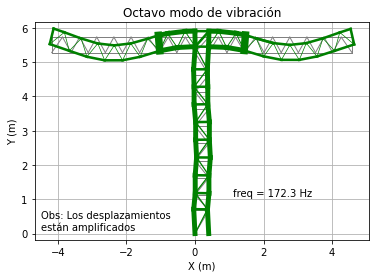

In [20]:
mod = 7
for barra in barras:
    barra.dibuja2D(False)
for barra in barras:
    barra.dibuja2D_deform(normalizado[mod], amp=.25, colorear=False)
plt.axis('equal');
plt.grid()
plt.title("Octavo modo de vibración")
plt.text(1.1, 1.1, f"freq = {frecuencias[mod]:.1f} Hz")
plt.text(-4.5, 0.1, "Obs: Los desplazamientos\nestán amplificados")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.savefig("Modo08.png", dpi=200)

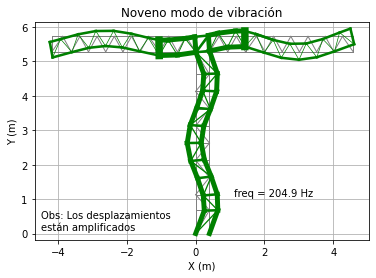

In [21]:
mod = 8
for barra in barras:
    barra.dibuja2D(False)
for barra in barras:
    barra.dibuja2D_deform(normalizado[mod], amp=.25, colorear=False)
plt.axis('equal');
plt.grid()
plt.title("Noveno modo de vibración")
plt.text(1.1, 1.1, f"freq = {frecuencias[mod]:.1f} Hz")
plt.text(-4.5, 0.1, "Obs: Los desplazamientos\nestán amplificados")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.savefig("Modo09.png", dpi=200)

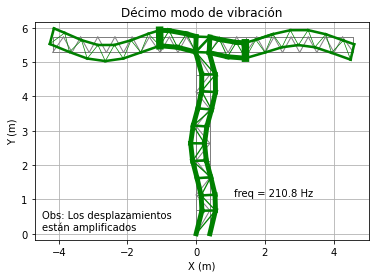

In [22]:
mod = 9
for barra in barras:
    barra.dibuja_2D(False)
for barra in barras:
    barra.dibuja2D_deform(normalizado[mod], amp=.25, colorear=False)
plt.axis('equal');
plt.grid()
plt.title("Décimo modo de vibración")
plt.text(1.1, 1.1, f"freq = {frecuencias[mod]:.1f} Hz")
plt.text(-4.5, 0.1, "Obs: Los desplazamientos\nestán amplificados")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.savefig("Modo10.png", dpi=200)

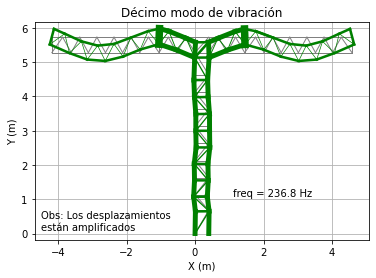

In [23]:
mod = 10
for barra in barras:
    barra.dibuja_2D(False)
for barra in barras:
    barra.dibuja2D_deform(normalizado[mod], amp=.25, colorear=False)
plt.axis('equal');
plt.grid()
plt.title("Décimo modo de vibración")
plt.text(1.1, 1.1, f"freq = {frecuencias[mod]:.1f} Hz")
plt.text(-4.5, 0.1, "Obs: Los desplazamientos\nestán amplificados")
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.savefig("Modo10.png", dpi=200)

In [24]:
len(barras)

117

In [25]:
propiedades['Ngdl']

116